In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle 
from scipy import signal

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

save_to = "C:\\Users\\Mohini chowdary\\Desktop\\shashank\Arthur_Wegel\\BEUMER-Becherwerk-20220408T120943Z-001\\BEUMER-Becherwerk\\BEUMER Kedro\\data\\06_models\\"

folder = "C:\\Users\\Mohini chowdary\\Desktop\\shashank\Arthur_Wegel\\BEUMER-Becherwerk-20220408T120943Z-001\\BEUMER-Becherwerk\\BEUMER Kedro\\data\\03_primary\\"


In [2]:
def getdf(folder, file):
    data = pd.read_csv(str(folder + file), sep=',')
    return data

In [3]:
file_neu = "neu.csv"
file_alt = "alt.csv"

file_neu1000 = "neu1000.csv"
file_alt1000 = "alt1000.csv"

file_neu2000 = "neu2000.csv"
file_alt2000 = "alt2000.csv"

df_neu = getdf(folder, file_neu)
df_alt = getdf(folder, file_alt)
df_neu.set_index("Unnamed: 0")
df_alt.set_index("Unnamed: 0")

df_neu1000 = getdf(folder, file_neu1000)
df_alt1000 = getdf(folder, file_alt1000)
df_neu1000.set_index("Unnamed: 0")
df_alt1000.set_index("Unnamed: 0")

df_neu2000 = getdf(folder, file_neu2000)
df_alt2000 = getdf(folder, file_alt2000)
df_neu2000.set_index("Unnamed: 0")
df_alt2000.set_index("Unnamed: 0")

,20.0,37.19298245614035,54.3859649122807,71.57894736842104,88.7719298245614,105.96491228070175,123.1578947368421,140.35087719298244,157.5438596491228,174.73684210526315,...,845.2631578947368,862.4561403508771,879.6491228070174,896.8421052631578,914.0350877192982,931.2280701754385,948.4210526315788,965.6140350877192,982.8070175438595,1000.0
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,0.0,263.910970,1854.159648,4427.366712,4879.250865,2704.169373,828.507695,195.576072,47.853944,23.345235,...,25968.431990,27138.069073,24975.198998,19602.182965,13649.682231,7061.323176,3119.911858,4707.416808,8775.060399,17639.639027
1,0.0,263.167247,1851.409463,4418.470889,4871.313273,2710.952600,840.277335,195.358645,31.384710,9.433981,...,26276.811089,27361.795500,25058.830499,19639.327127,13672.746067,7041.154735,3201.888505,4568.977128,8316.390623,17259.419283
2,0.0,261.457454,1839.187049,4387.633645,4823.911483,2661.774032,808.082298,187.480666,52.630789,47.801674,...,26479.135956,27263.343375,24429.525681,18896.714027,13291.033444,6725.826789,2637.784108,3757.546673,6895.422830,16312.934408
3,0.0,261.938924,1843.687609,4404.971056,4861.608993,2699.693501,817.195815,179.799889,41.000000,13.038405,...,25416.981902,26230.564500,23956.884313,18879.599837,13270.797452,6802.361502,3268.127598,4596.383905,8087.368546,17110.914207
4,0.0,263.638009,1856.803705,4430.378991,4878.584323,2693.407136,800.201225,163.232962,34.885527,23.323808,...,25899.713068,27325.058463,25321.784396,19828.162421,13450.774922,6597.954607,3346.099969,5017.465197,8949.835809,18074.244355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,0.0,262.185049,1840.782442,4390.695275,4830.478651,2672.157368,822.329618,211.558503,67.186308,31.064449,...,25145.836276,26347.188939,26387.368588,19098.004137,7913.299438,1807.586236,7639.106230,10736.781315,3983.319344,16451.687968
1810,0.0,263.638009,1848.867762,4407.127409,4849.936598,2674.421994,793.614516,168.404275,47.381431,30.805844,...,24523.399316,25715.889660,26036.325259,19071.491866,7942.654972,1740.697849,7719.425885,10592.020582,3634.570951,17067.488274
1811,0.0,264.140114,1857.435059,4439.434423,4898.375343,2718.266543,828.613903,193.258894,55.009090,43.011626,...,24928.063563,26085.658608,26210.291795,19019.061859,7829.996807,1693.701568,7611.023584,10331.138272,3093.644130,17556.047534


In [4]:
#nächste Nachbarn für knn & Größe der Testmenge für train_test_split
nneighbors = 2
test_size = 0.25
columns_to_drop = ['20.0','37.19298245614035','54.3859649122807','71.57894736842104','88.7719298245614','105.96491228070175','123.1578947368421','140.35087719298244','157.5438596491228','174.73684210526315','191.9298245614035','209.12280701754383','226.3157894736842','570.1754385964912','587.3684210526316','604.5614035087718','621.7543859649122','638.9473684210526','656.1403508771929','673.3333333333333','690.5263157894736','707.719298245614','724.9122807017543','742.1052631578947','759.2982456140351','776.4912280701753','793.6842105263157','810.8771929824561','828.0701754385964','845.2631578947368','862.4561403508771','879.6491228070174','896.8421052631578','914.0350877192982','931.2280701754385','948.4210526315788','965.6140350877192','982.8070175438595','1000.0']
df_neu.drop(columns = columns_to_drop, inplace=True)
df_alt.drop(columns = columns_to_drop, inplace=True)
df_neu1000.drop(columns = columns_to_drop, inplace=True)
df_alt1000.drop(columns = columns_to_drop, inplace=True)
df_neu2000.drop(columns = columns_to_drop, inplace=True)
df_alt2000.drop(columns = columns_to_drop, inplace=True)

In [5]:
z_df_neu = df_neu
z_df_alt = df_alt
z_df_neu1000 = df_neu1000
z_df_alt1000 = df_alt1000
z_df_neu2000 = df_neu2000
z_df_alt2000 = df_alt2000

In [6]:
z_df_neu['Label'] = 'neu'
z_df_alt['Label'] = 'alt'
frames = [z_df_neu, z_df_alt]
result = pd.concat(frames)
result = shuffle(result)

x = result.iloc[:, :-1].values
y = result.iloc[:, len(result.columns)-1].values

z_df_neu1000['Label'] = 'neu'
z_df_alt1000['Label'] = 'alt'
frames1000 = [z_df_neu1000, z_df_alt1000]
result1000 = pd.concat(frames1000)
result1000 = shuffle(result1000)

x1000 = result1000.iloc[:, :-1].values
y1000 = result1000.iloc[:, len(result1000.columns)-1].values

z_df_neu2000['Label'] = 'neu'
z_df_alt2000['Label'] = 'alt'
frames2000 = [z_df_neu2000, z_df_alt2000]
result2000 = pd.concat(frames2000)
result2000 = shuffle(result2000)

x2000 = result2000.iloc[:, :-1].values
y2000 = result2000.iloc[:, len(result2000.columns)-1].values

In [7]:
# So, x is all the 29 columns that are used as features for training the ML classifiers and y is the output class label
result

,Unnamed: 0,243.50877192982455,260.7017543859649,277.89473684210526,295.0877192982456,312.2807017543859,329.4736842105263,346.66666666666663,363.859649122807,381.05263157894734,...,415.43859649122805,432.6315789473684,449.8245614035087,467.0175438596491,484.2105263157894,501.40350877192975,518.5964912280701,535.7894736842105,552.9824561403508,Label
2709,2709,1970.399452,14072.254759,41038.740161,26850.485173,18819.438594,24812.198311,43936.191938,19664.865929,9673.502003,...,23736.743353,35458.450192,34961.157203,28223.230237,18421.398264,13709.011963,9046.813859,4528.077407,2891.542322,neu
4999,4999,1906.850020,13855.230420,26854.578921,18576.814905,23674.683208,15459.066207,24213.321168,10406.195510,14571.354810,...,23537.261629,33487.722885,32122.433843,30753.294864,18825.724554,12714.904836,10357.320358,8316.769685,8067.318576,neu
2837,2837,2899.643599,16532.094271,27609.867222,22361.921429,20961.454243,15674.574476,17125.674118,8769.962942,9475.382050,...,9641.847333,8572.333230,9505.931043,15874.281338,17427.026482,12570.939503,8828.668416,15214.352862,30929.356023,alt
1460,1460,4123.674211,19589.026979,20858.143733,13650.923082,14542.268599,12122.483244,26736.374567,34305.142836,14268.690515,...,33459.305985,32797.429854,26535.510283,21636.643386,18951.172127,17775.114571,21644.466568,26084.112713,22700.980618,neu
2703,2703,1963.098062,13930.193179,39437.712332,27880.746977,19802.040551,25445.265178,42635.129295,19796.324533,9799.343090,...,23890.933950,35732.368925,37282.032201,28476.537149,18661.058410,13866.279241,9152.188208,4570.584645,2754.328230,neu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,340,1402.239994,11691.561145,37438.694756,30498.451436,19871.535145,21622.383079,40620.458995,23737.269472,11767.979776,...,15376.709466,29168.085882,38657.528853,35771.634908,22189.079296,9579.491479,6697.579936,8105.929250,9590.570630,alt
48,48,4270.727573,19735.130428,42395.904531,22445.717676,18839.889941,26574.343115,9531.843736,15307.605691,29694.758763,...,25848.216998,19215.119386,5756.028144,8560.839445,17769.648280,23014.997480,31464.678165,19008.445807,2330.728856,neu
501,501,4394.839360,20145.258623,39201.610222,23335.564724,19406.131042,20721.590914,11103.008826,21859.377713,31119.071082,...,25235.360925,19015.506225,6107.820561,8283.338699,17974.840111,25123.738456,34527.998277,23962.349822,12121.637266,neu
5223,5223,1844.393125,13800.081811,35073.996807,30500.041262,24166.561878,32947.879279,24294.077159,10392.230992,15236.062615,...,22157.830422,29184.322863,26853.901206,29786.175401,18383.123130,12722.451729,10660.919379,8722.996962,8440.420902,neu


In [8]:
x

array([[ 2709.        ,  1970.39945189, 14072.25475892, ...,
         9046.81385903,  4528.07740658,  2891.54232201],
       [ 4999.        ,  1906.85002032, 13855.23042031, ...,
        10357.32035808,  8316.7696854 ,  8067.31857559],
       [ 2837.        ,  2899.64359879, 16532.09427145, ...,
         8828.66841602, 15214.35286169, 30929.35602304],
       ...,
       [  501.        ,  4394.83935998, 20145.25862331, ...,
        34527.99827676, 23962.34982217, 12121.63726565],
       [ 5223.        ,  1844.39312512, 13800.08181135, ...,
        10660.91937874,  8722.99696205,  8440.42090183],
       [ 5884.        ,  2331.96676649, 14933.00200897, ...,
         4744.00885328,  2877.23217694,  1058.00047259]])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
X_train1000, X_test1000, y_train1000, y_test1000 = train_test_split(x1000, y1000, test_size=test_size)
X_train2000, X_test2000, y_train2000, y_test2000 = train_test_split(x2000, y2000, test_size=test_size)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(X_train1000)
X_train1000 = scaler.transform(X_train1000)
X_test1000 = scaler.transform(X_test1000)
scaler.fit(X_train2000)
X_train2000 = scaler.transform(X_train2000)
X_test2000 = scaler.transform(X_test2000)

# train the model
clf = KNeighborsClassifier(n_neighbors=nneighbors)
model_knn = clf.fit(X_train, y_train)

clf_tree = DecisionTreeClassifier()
model_tree = clf_tree.fit(X_train, y_train)

model_svm = SVC(kernel='rbf')
model_svm.fit(X_train, y_train)

# train the model
clf1000 = KNeighborsClassifier(n_neighbors=nneighbors)
model_knn1000 = clf1000.fit(X_train1000, y_train1000)

clf_tree1000 = DecisionTreeClassifier()
model_tree1000 = clf_tree1000.fit(X_train1000, y_train1000)

model_svm1000 = SVC(kernel='rbf')
model_svm1000.fit(X_train1000, y_train1000)

# train the model
clf2000 = KNeighborsClassifier(n_neighbors=nneighbors)
model_knn2000 = clf2000.fit(X_train2000, y_train2000)

clf_tree2000 = DecisionTreeClassifier()
model_tree2000 = clf_tree2000.fit(X_train2000, y_train2000)

model_svm2000 = SVC(kernel='rbf')
model_svm2000.fit(X_train2000, y_train2000)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

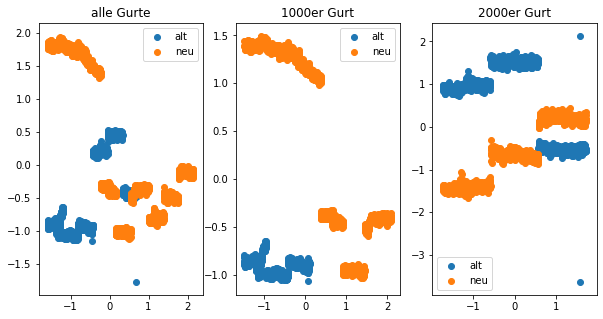

In [10]:
plt.rcParams['figure.figsize'] = [10, 5]

plt.subplot(1, 3, 1)
X_set, y_set = X_train, y_train
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],label = j)
    #print(i,j) # Each row in X_set has 30 array elements,
    # here only the 0th and 1st index are being considered for graph plot. 
plt.title("alle Gurte")
plt.legend()

plt.subplot(1, 3, 2)
X_set1000, y_set1000 = X_train1000, y_train1000
for i,j in enumerate(np.unique(y_set1000)):
    plt.scatter(X_set1000[y_set1000==j,0],X_set1000[y_set1000==j,1],label = j)
plt.title("1000er Gurt")
plt.legend()

plt.subplot(1, 3, 3)
X_set2000, y_set2000 = X_train2000, y_train2000
for i,j in enumerate(np.unique(y_set2000)):
    plt.scatter(X_set2000[y_set2000==j,0],X_set2000[y_set2000==j,1],label = j)
plt.title("2000er Gurt")
plt.legend()

plt.show()
# Did not understand thge below graph/distribution. What are these x and y-axis values?
# I believe these graphs only indicate how well each feature separates the alt and neu datasets
# Maybe I will have to manually check each and every feature 

In [11]:
y_pred_knn = model_knn.predict(X_test)
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

y_pred_tree = model_tree.predict(X_test)
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

y_pred_svm = model_svm.predict(X_test)
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
# How come the below results are 100% accurate? Is it because I am using test set for training instead of the training set?
# We are anyway spliting the dataset in the above cell for training and testing

[[ 879    0]
 [   0 1505]]
              precision    recall  f1-score   support

         alt       1.00      1.00      1.00       879
         neu       1.00      1.00      1.00      1505

    accuracy                           1.00      2384
   macro avg       1.00      1.00      1.00      2384
weighted avg       1.00      1.00      1.00      2384

[[ 878    1]
 [   1 1504]]
              precision    recall  f1-score   support

         alt       1.00      1.00      1.00       879
         neu       1.00      1.00      1.00      1505

    accuracy                           1.00      2384
   macro avg       1.00      1.00      1.00      2384
weighted avg       1.00      1.00      1.00      2384

[[ 878    1]
 [   0 1505]]
              precision    recall  f1-score   support

         alt       1.00      1.00      1.00       879
         neu       1.00      1.00      1.00      1505

    accuracy                           1.00      2384
   macro avg       1.00      1.00      1.00    

In [12]:
y_pred_knn1000 = model_knn1000.predict(X_test1000)
print(confusion_matrix(y_test1000, y_pred_knn1000))
print(classification_report(y_test1000, y_pred_knn1000))

y_pred_tree1000 = model_tree1000.predict(X_test1000)
print(confusion_matrix(y_test1000, y_pred_tree1000))
print(classification_report(y_test1000, y_pred_tree1000))

y_pred_svm1000 = model_svm1000.predict(X_test1000)
print(confusion_matrix(y_test1000, y_pred_svm1000))
print(classification_report(y_test1000, y_pred_svm1000))

[[ 467    0]
 [   0 1011]]
              precision    recall  f1-score   support

         alt       1.00      1.00      1.00       467
         neu       1.00      1.00      1.00      1011

    accuracy                           1.00      1478
   macro avg       1.00      1.00      1.00      1478
weighted avg       1.00      1.00      1.00      1478

[[ 467    0]
 [   0 1011]]
              precision    recall  f1-score   support

         alt       1.00      1.00      1.00       467
         neu       1.00      1.00      1.00      1011

    accuracy                           1.00      1478
   macro avg       1.00      1.00      1.00      1478
weighted avg       1.00      1.00      1.00      1478

[[ 467    0]
 [   0 1011]]
              precision    recall  f1-score   support

         alt       1.00      1.00      1.00       467
         neu       1.00      1.00      1.00      1011

    accuracy                           1.00      1478
   macro avg       1.00      1.00      1.00    

In [13]:
y_pred_knn2000 = model_knn2000.predict(X_test2000)
print(confusion_matrix(y_test2000, y_pred_knn2000))
print(classification_report(y_test2000, y_pred_knn2000))

y_pred_tree2000 = model_tree2000.predict(X_test2000)
print(confusion_matrix(y_test2000, y_pred_tree2000))
print(classification_report(y_test2000, y_pred_tree2000))

y_pred_svm2000 = model_svm2000.predict(X_test2000)
print(confusion_matrix(y_test2000, y_pred_svm2000))
print(classification_report(y_test2000, y_pred_svm2000))

[[480   0]
 [  0 427]]
              precision    recall  f1-score   support

         alt       1.00      1.00      1.00       480
         neu       1.00      1.00      1.00       427

    accuracy                           1.00       907
   macro avg       1.00      1.00      1.00       907
weighted avg       1.00      1.00      1.00       907

[[480   0]
 [  1 426]]
              precision    recall  f1-score   support

         alt       1.00      1.00      1.00       480
         neu       1.00      1.00      1.00       427

    accuracy                           1.00       907
   macro avg       1.00      1.00      1.00       907
weighted avg       1.00      1.00      1.00       907

[[480   0]
 [  0 427]]
              precision    recall  f1-score   support

         alt       1.00      1.00      1.00       480
         neu       1.00      1.00      1.00       427

    accuracy                           1.00       907
   macro avg       1.00      1.00      1.00       907
weigh

In [14]:
# Its important to use binary mode 
knnPickle = save_to + 'model_knn'
treePickle = save_to + 'model_tree'
svmPickle = save_to + 'model_svm'

knnPickle1000 = save_to + 'model_knn1000'
treePickle1000 = save_to + 'model_tree1000' 
svmPickle1000 = save_to + 'model_svm1000'

knnPickle2000 = save_to + 'model_knn2000'
treePickle2000 = save_to + 'model_tree2000'
svmPickle2000 = save_to + 'model_svm2000'

# source, destination 
pickle.dump(model_knn, knnPickle)
pickle.dump(model_tree, treePickle)
pickle.dump(model_svm, svmPickle)

pickle.dump(model_knn1000, knnPickle1000)
pickle.dump(model_tree1000, treePickle1000)
pickle.dump(model_svm1000, svmPickle1000)

pickle.dump(model_knn2000, knnPickle2000)
pickle.dump(model_tree2000, treePickle2000)
pickle.dump(model_svm2000, svmPickle2000)

TypeError: file must have a 'write' attribute